In [4]:
from environments.h2000_v90 import citation
import torch
import numpy as np

In [8]:
from core_algorithms.model_utils import activations
from torch.nn import functional as F


In [83]:
time = np.linspace(0, 1, 10).reshape(-1, 1)
t_prime = np.random.uniform(-0.3, 0.3, 10)
t_prime

array([-0.05038551, -0.23842256, -0.09143617, -0.05123099,  0.07695792,
        0.05210395,  0.23300569,  0.27183144, -0.24856807, -0.19521205])

In [84]:
time.shape

(10, 1)

In [85]:

def theta(t):
    return np.rad2deg(np.arcsin(t+np.random.normal(0, 0.1, 1)))[0]
def phi(t):
    return np.rad2deg(np.arcsin(t+np.random.normal(0, 0.1, 1)))[0]
def psi(t):
    return 0

refs = [theta, phi, psi]
[ref(0) for ref in refs]


[-1.828208520783809, -1.5515434018773473, 0]

In [86]:
ref_values = []
for t in t_prime:
    ref_value = np.deg2rad(np.array([ref(t) for ref in refs]).flatten())
    ref_values.append(ref_value)

ref_values = np.asarray(ref_values)
ref_values

array([[ 0.00750797, -0.20686614,  0.        ],
       [-0.06012905, -0.21987646,  0.        ],
       [-0.04173821, -0.16093211,  0.        ],
       [-0.04394031,  0.05144438,  0.        ],
       [ 0.12644728,  0.00066547,  0.        ],
       [ 0.1545105 , -0.19438296,  0.        ],
       [ 0.21525124,  0.27352578,  0.        ],
       [ 0.16534397,  0.18069103,  0.        ],
       [-0.21253527, -0.39641178,  0.        ],
       [-0.02737338, -0.12977261,  0.        ]])

In [87]:
u_list = []
for _ in range(len(t_prime)):
    action = np.random.uniform(-1, 1, 3)
    action = np.clip(action, -1, 1)
    u_list.append(action.flatten())

actions = np.asarray(u_list)
actions

array([[ 0.67039055, -0.14967135,  0.32048833],
       [-0.84803484,  0.41690775,  0.48877524],
       [-0.34148924, -0.29250056, -0.43287196],
       [ 0.22117394,  0.94035267, -0.54853715],
       [-0.42511662,  0.9705731 , -0.47491632],
       [ 0.48702922, -0.05974266,  0.11853137],
       [-0.66205618,  0.1873301 ,  0.96340404],
       [-0.41853288,  0.47528405,  0.79087862],
       [-0.97971892,  0.46589609,  0.55066409],
       [-0.81493187,  0.27077809, -0.12795439]])

In [88]:
rewards = np.random.uniform(-10, 10, len(t_prime)).reshape(-1, 1)
rewards

array([[-8.9531437 ],
       [ 4.39819394],
       [-3.68907169],
       [ 2.66357649],
       [ 3.66443165],
       [ 7.17617383],
       [ 9.33586264],
       [ 2.93205801],
       [ 7.02817728],
       [ 8.22308395]])

In [89]:
# obs_state: [dtheta, dphi, dpsi] + [p, q, r, V, alpha, beta, phi, theta, psi, h] = x:
x_list = []
for _ in range(len(t_prime)):
    x = np.random.uniform(-1, 1, 10)
    x_list.append(x)

x_list = np.asarray(x_list)
x_list



array([[-0.14912915, -0.33980903,  0.00158073,  0.49185098,  0.14654198,
        -0.11146587, -0.17976628,  0.07878749, -0.06517894, -0.84888077],
       [-0.88879238, -0.0231541 ,  0.58608596,  0.1011469 , -0.19211116,
         0.10821938,  0.26862229,  0.76278092, -0.77352365, -0.11334559],
       [-0.0221887 , -0.86304211, -0.48842496,  0.11560908, -0.24623318,
         0.30575935, -0.54493877,  0.16722764, -0.80265059,  0.62863396],
       [-0.68391492, -0.59258861,  0.33274858, -0.39381475, -0.99262595,
         0.60342484, -0.95367799, -0.76177884,  0.63609998,  0.13496876],
       [ 0.7481245 ,  0.97318998,  0.45161794, -0.41879696,  0.87995446,
         0.76772049,  0.27634189,  0.92757951,  0.08500077, -0.37291441],
       [-0.15345806,  0.17243173,  0.09326034, -0.68182666, -0.3108219 ,
        -0.99583529, -0.67831261, -0.63277733,  0.71236679,  0.34244429],
       [ 0.16364584, -0.75935293,  0.62359482,  0.09938952, -0.13173924,
         0.65418233,  0.22256936,  0.39961513

In [90]:
data = np.concatenate((ref_values, actions, x_list, rewards, time), axis=1)
data.shape

(10, 18)

In [91]:
from evaluation_utils import Stats
stats = Stats(0.45, 2.0, -5.4, 3.6)

In [25]:


import numpy as np

In [26]:
# data = pd.read_csv('nominal_trajectory.csv')
# data.shape

In [27]:
data = np.loadtxt('nominal_trajectory.csv', delimiter=' ')

In [28]:
data.shape

(8001, 20)

$\theta \phi \psi$

(<Figure size 640x480 with 6 Axes>,
 array([-1.14306402e-04, -1.97026631e-04, -3.31040940e-04, ...,
        -5.43033252e-01, -5.41804407e-01, -5.38131122e-01]))

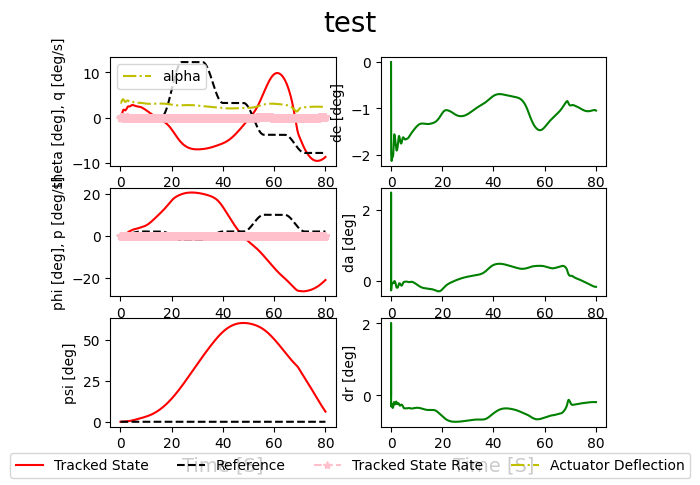

In [34]:
from plotters.plot_utils import plot
plot(data, name='test', fault='test')

In [92]:
theta_ref, phi_ref, psi_ref = np.rad2deg(
    data[:, 0]), np.rad2deg(data[:, 1]), np.rad2deg(data[:, 2])

p, q, r, alpha, beta, phi, theta, psi = x_list[:,0], x_list[:,1], x_list[:,2], x_list[:,4], x_list[:,5], x_list[:,6], x_list[:,7], x_list[:,8]

de, da, dr = actions[:, 0], actions[:, 1], actions[:, 2]


In [136]:
p = np.rad2deg(p)
q = np.rad2deg(q)
alpha = np.rad2deg(alpha)
phi = np.rad2deg(phi)
theta = np.rad2deg(theta)
psi = np.rad2deg(psi)

de = np.rad2deg(de)
da = np.rad2deg(da)
dr = np.rad2deg(dr)

In [137]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [12, 12]

In [138]:
t_prime *=0.1

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/tmp/ipykernel_6520/3669564037.py:34: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  fig.legend([l1, l2, l3, l4], labels=labels, loc='lower center', ncol=4)


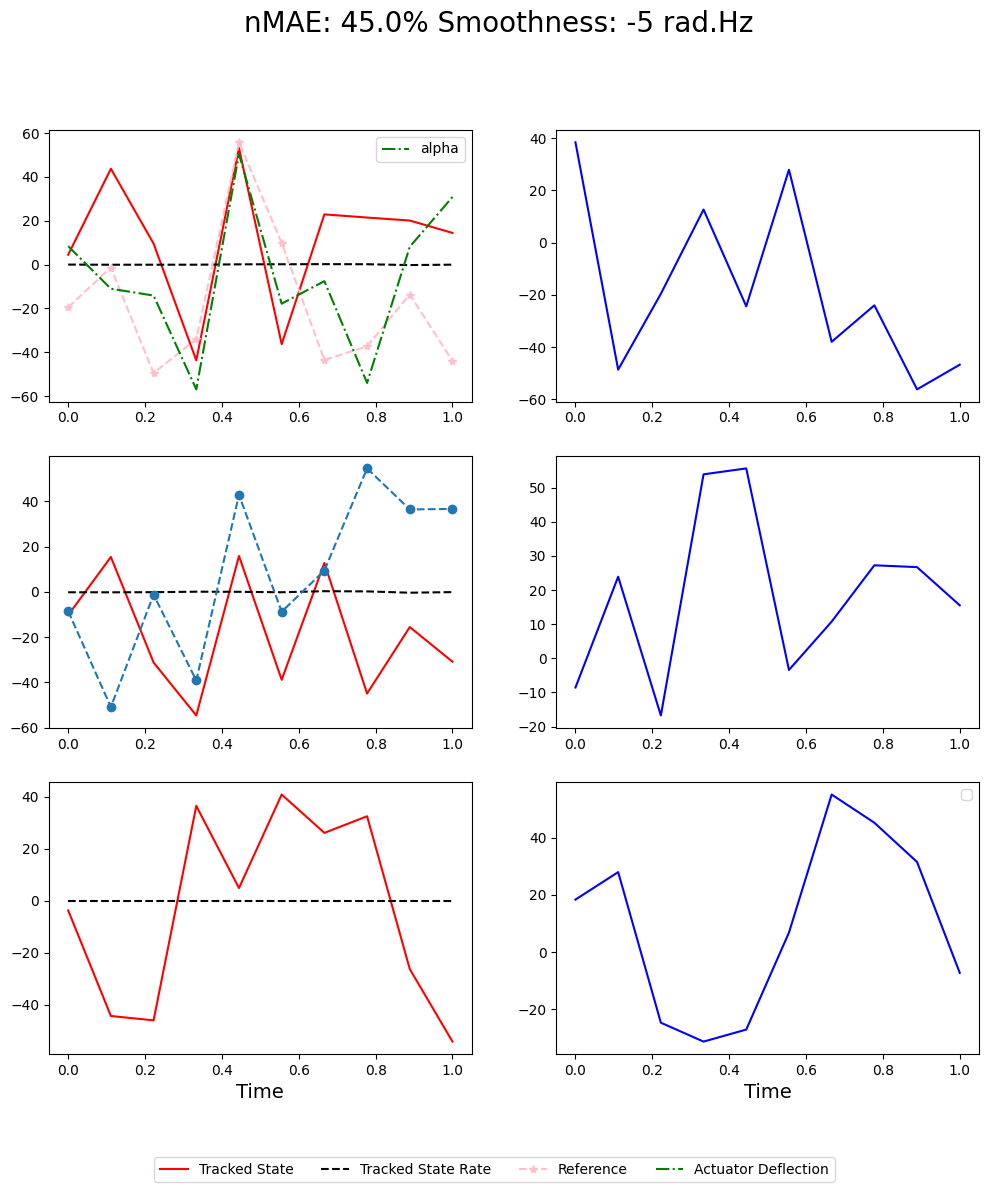

In [141]:
name = f'nMAE: {stats.nmae:0.1%} Smoothness: {stats.sm:0.0f} rad.Hz'

fig, axis = plt.subplots(3, 2)

labels = ['Tracked State', 'Tracked State Rate', 'Reference', 'Actuator Deflection']

l1 = axis[0,0].plot(time, theta, color='red')
l3 = axis[0,0].plot(time, theta_ref, color='black', linestyle='--')
l2 = axis[0,0].plot(time, q, '*--', color='pink' )
axis[0,0].plot(time, alpha, '-.', color='green', label='alpha')
axis.flat[0].legend()

l4 = axis[0,1].plot(time, de, 'b')
# axis[0,1].legend()

axis[1,0].plot(time, phi, 'r', label=labels[0])
axis[1,0].plot(time, phi_ref, 'k--', label=labels[2])
axis[1,0].plot(time, p, 'o--', label=labels[1])
# axis[1,0].legend()

axis[1,1].plot(time, da, 'b', label=labels[3])
# axis[1,1].legend()

axis[2,0].plot(time, psi, 'r', label=labels[0])
axis[2,0].plot(time, psi_ref, 'k--', label=labels[2])
axis[2,0].set_xlabel('Time', fontsize=14)
# axis[2,0].legend()


axis[2,1].plot(time, dr, 'b')
axis[2,1].legend()
axis[2,1].set_xlabel('Time', fontsize=14)
fig.suptitle(name, fontsize=20)
fig.legend([l1, l2, l3, l4], labels=labels, loc='lower center', ncol=4)
# fig.supxlabel('Time')
#plt.legend()
# plt.show()

In [142]:
fig.show()

/tmp/ipykernel_6520/89474557.py:1: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


In [10]:
np.sin(np.deg2rad(45))

0.7071067811865475

In [2]:
l1 = [1, 2, 3, 4, 5]
l2 = [6, 7, 8, 9, 10]
list(zip(l1, l2))

[(1, 6), (2, 7), (3, 8), (4, 9), (5, 10)]

In [10]:
activation = activations['tanh']
activ_layer = F.tanh

In [11]:
activation(torch.tensor([1.0, 2.0, 3.0])) == activ_layer(torch.tensor([1.0, 2.0, 3.0]))

tensor([True, True, True])

In [11]:
np.random.randint(5, size=3)

array([3, 0, 1])

In [13]:
evals = np.random.randint(100, size=10)
evals

array([48, 61, 91, 20, 72, 64, 69,  2,  9, 83])

In [18]:
genomes = np.arange(10)
genomes

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [24]:
groups = []
for i, first in enumerate(genomes):
    for second in genomes[i+1:]:
        if evals[first] < evals[second]:
            groups.append((second, first, evals[first]+evals[second]))
        else:
            groups.append((first, second, evals[first]+evals[second]))
            
sorted(groups, key=lambda x: x[2], reverse=True)


[(2, 9, 174),
 (2, 4, 163),
 (2, 6, 160),
 (2, 5, 155),
 (9, 4, 155),
 (2, 1, 152),
 (9, 6, 152),
 (9, 5, 147),
 (9, 1, 144),
 (4, 6, 141),
 (2, 0, 139),
 (4, 5, 136),
 (4, 1, 133),
 (6, 5, 133),
 (9, 0, 131),
 (6, 1, 130),
 (5, 1, 125),
 (4, 0, 120),
 (6, 0, 117),
 (5, 0, 112),
 (2, 3, 111),
 (1, 0, 109),
 (9, 3, 103),
 (2, 8, 100),
 (2, 7, 93),
 (4, 3, 92),
 (9, 8, 92),
 (6, 3, 89),
 (9, 7, 85),
 (5, 3, 84),
 (1, 3, 81),
 (4, 8, 81),
 (6, 8, 78),
 (4, 7, 74),
 (5, 8, 73),
 (6, 7, 71),
 (1, 8, 70),
 (0, 3, 68),
 (5, 7, 66),
 (1, 7, 63),
 (0, 8, 57),
 (0, 7, 50),
 (3, 8, 29),
 (3, 7, 22),
 (8, 7, 11)]

In [14]:
fit_evals = np.array(evals)
fit_evals

array([48, 61, 91, 20, 72, 64, 69,  2,  9, 83])

In [16]:
np.argsort(fit_evals)[::-1]

array([2, 9, 4, 6, 5, 1, 0, 3, 8, 7])

In [6]:
print(citation.initialize())

None


In [2]:
torch.__version__

'2.0.0+cu117'

In [7]:
torch.cuda.is_available()

True

In [8]:
torch.version.cuda

'11.7'

In [11]:
citation.initialize()

input = np.zeros((10,))
input

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [13]:
x = citation.step(input)

In [14]:
x

array([ 5.14511340e-15, -3.10150901e-03, -2.66269961e-15,  8.99998899e+01,
        5.59248529e-02, -4.84839698e-14,  2.59608529e-17,  3.66017228e-03,
       -1.33996579e-17,  1.99995297e+03,  8.98769684e-01, -4.36894623e-14])

In [16]:
error = np.zeros(3)
error

array([0., 0., 0.])

In [20]:
obs = np.hstack((error, x[range(10)]))

In [22]:
obs.shape, obs

((13,),
 array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  5.14511340e-15,
        -3.10150901e-03, -2.66269961e-15,  8.99998899e+01,  5.59248529e-02,
        -4.84839698e-14,  2.59608529e-17,  3.66017228e-03, -1.33996579e-17,
         1.99995297e+03]))

In [23]:
np.deg2rad(45)

0.7853981633974483

In [63]:
import jsbsim
import time

In [105]:
fdm = jsbsim.FGFDMExec("environments/JSBSim", None)
fdm.load_model("citation")
fdm.set_output_directive("data_output/flightgear.xml")
fdm.load_ic("cruise_init", True)
fdm.run_ic()
fdm["gear/gear-cmd-norm"] = 0
for _ in range(10):
    fdm.run()
fdm.do_trim(1)

# while fdm.run() and fdm.get_sim_time() < 100:
#     print(fdm.get_sim_time())
#     fdm.run()
#     time.sleep(fdm.get_delta_t())
   




     JSBSim Flight Dynamics Model v1.1.13 Dec  3 2022 12:34:26
            [JSBSim-ML v2.0]

JSBSim startup beginning ...

Reading Aircraft Configuration File: Cessna Citation II 550 Jet Passenger Aircraft
                            Version: 2.0


This aircraft model is a BETA release!!!

This aircraft model probably will not fly as expected.

Use this model for development purposes ONLY!!!

  Description:   Models a Cessna Citation II 550.
  Model Author:  Aeromatic v 3.3.11
  Creation Date: 2020-04-09
  Version:       $Revision: 1.81 $

  Aircraft Metrics:
    WingArea: 323.000000
    WingSpan: 51.700000
    Incidence: 0.017453
    Chord: 6.680000
    H. Tail Area: 140.400000
    H. Tail Arm: 42.400000
    V. Tail Area: 47.100000
    V. Tail Arm: 43.600000
    Eyepoint (x, y, z): 39.690000 , -30.000000 , 70.000000
    Ref Pt (x, y, z): 276.132000 , 0.000000 , 0.000000
    Visual Ref Pt (x, y, z): 0.000000 , 0.000000 , 0.000000

  Mass and Balance:
    baseIxx: 9140.000000 slug-ft2


In file environments/JSBSim/aircraft/citation/citation.xml: line 232
Engine location ignored, only thruster location is used.

In file environments/JSBSim/aircraft/citation/citation.xml: line 237
Engine orientation ignored, only thruster orientation is used.

In file environments/JSBSim/aircraft/citation/citation.xml: line 260
Engine location ignored, only thruster location is used.

In file environments/JSBSim/aircraft/citation/citation.xml: line 265
Engine orientation ignored, only thruster orientation is used.

In file environments/JSBSim/aircraft/citation/citation.xml: line 1311
      Property fcs/aileron-cmd-norm is already defined.

In file environments/JSBSim/aircraft/citation/citation.xml: line 1312
      Property fcs/elevator-cmd-norm is already defined.

In file environments/JSBSim/aircraft/citation/citation.xml: line 1313
      Property fcs/rudder-cmd-norm is already defined.

In file environments/JSBSim/aircraft/citation/citation.xml: line 1314
      Property fcs/throttle-

In [96]:
fdm.get_property_catalog()

['inertial/sea-level-radius_ft (R)',
 'simulation/gravity-model (RW)',
 'simulation/integrator/rate/rotational (RW)',
 'simulation/integrator/rate/translational (RW)',
 'simulation/integrator/position/rotational (RW)',
 'simulation/integrator/position/translational (RW)',
 'simulation/write-state-file (W)',
 'simulation/channel-dt (R)',
 'simulation/gravitational-torque (RW)',
 'simulation/force-output (W)',
 'simulation/do_simple_trim (W)',
 'simulation/reset (W)',
 'simulation/disperse (R)',
 'simulation/randomseed (RW)',
 'simulation/terminate (RW)',
 'simulation/pause (RW)',
 'simulation/sim-time-sec (R)',
 'simulation/dt (R)',
 'simulation/jsbsim-debug (RW)',
 'simulation/frame (RW)',
 'simulation/trim-completed (RW)',
 'simulation/output/log_rate_hz (RW)',
 'simulation/output/enabled (RW)',
 'velocities/h-dot-fps (R)',
 'velocities/v-north-fps (R)',
 'velocities/v-east-fps (R)',
 'velocities/v-down-fps (R)',
 'velocities/u-fps (R)',
 'velocities/v-fps (R)',
 'velocities/w-fps (R)

In [97]:
print({
    "elevator": [fdm['fcs/elevator-pos-rad'], fdm['fcs/elevator-cmd-norm']],
    "left-aileron": [fdm['fcs/left-aileron-pos-rad'], fdm['fcs/aileron-cmd-norm']],
    "rudder": [fdm['fcs/rudder-pos-rad'], fdm['fcs/rudder-cmd-norm']]
})


{'elevator': [-0.03227545188287851, 0.0], 'left-aileron': [-5.688945793439429e-07, -1.7135378895901894e-06], 'rudder': [-4.552028747622394e-06, -1.1854241530266652e-05]}


In [98]:
action = np.array([0.5, 0.25, 0.5])
[de, da, dr] = action
de, da, dr

(0.5, 0.25, 0.5)

In [99]:
[de_cmd, da_cmd, dr_cmd] = np.array([0.5, 0.6, 0.25])

In [100]:

pause_delay = 0.1
physics_per_sec = int(1/fdm.get_delta_t())
realtime_delay = fdm.get_delta_t() 
realtime = True
# fdm['fcs/left-aileron-pos-rad'] = da

# fdm['fcs/right-aileron-pos-rad'] = -da

# fdm['fcs/elevator-pos-rad'] = de

# fdm['fcs/rudder-pos-rad'] = dr
for i in range(100):
    fdm['fcs/aileron-cmd-norm'] = da_cmd
    fdm['fcs/elevator-cmd-norm'] = de_cmd
    fdm['fcs/rudder-cmd-norm'] = dr_cmd
    for i in range(int(pause_delay*physics_per_sec)):
        fdm['fcs/aileron-cmd-norm'] = da_cmd
        fdm['fcs/elevator-cmd-norm'] = de_cmd
        fdm['fcs/rudder-cmd-norm'] = dr_cmd
        fdm.run()
        if realtime:
            time.sleep(realtime_delay)
    
    print({
        "elevator": [fdm['fcs/elevator-pos-rad'], fdm['fcs/elevator-cmd-norm']],
        "left-aileron": [fdm['fcs/left-aileron-pos-rad'], fdm['fcs/aileron-cmd-norm']],
        "rudder": [fdm['fcs/rudder-pos-rad'], fdm['fcs/rudder-cmd-norm']]
    })



{'elevator': [0.11499520734008073, 0.5], 'left-aileron': [0.1782, 0.6], 'rudder': [0.096, 0.25]}
{'elevator': [0.11499520734008073, 0.5], 'left-aileron': [0.1782, 0.6], 'rudder': [0.096, 0.25]}
{'elevator': [0.11499520734008073, 0.5], 'left-aileron': [0.1782, 0.6], 'rudder': [0.096, 0.25]}
{'elevator': [0.11499520734008073, 0.5], 'left-aileron': [0.1782, 0.6], 'rudder': [0.096, 0.25]}
{'elevator': [0.11499520734008073, 0.5], 'left-aileron': [0.1782, 0.6], 'rudder': [0.096, 0.25]}
{'elevator': [0.11499520734008073, 0.5], 'left-aileron': [0.1782, 0.6], 'rudder': [0.096, 0.25]}
{'elevator': [0.11499520734008073, 0.5], 'left-aileron': [0.1782, 0.6], 'rudder': [0.096, 0.25]}
{'elevator': [0.11499520734008073, 0.5], 'left-aileron': [0.1782, 0.6], 'rudder': [0.096, 0.25]}
{'elevator': [0.11499520734008073, 0.5], 'left-aileron': [0.1782, 0.6], 'rudder': [0.096, 0.25]}
{'elevator': [0.11499520734008073, 0.5], 'left-aileron': [0.1782, 0.6], 'rudder': [0.096, 0.25]}
{'elevator': [0.11499520734008

In [2]:

from environments.aircraftenv import AircraftEnv


In [5]:
env = AircraftEnv(configuration="full_control", render_mode=True, realtime=True, incremental=False)

Full State Control.



     JSBSim Flight Dynamics Model v1.1.13 Dec  3 2022 12:34:26
            [JSBSim-ML v2.0]

JSBSim startup beginning ...

Reading Aircraft Configuration File: Cessna Citation II 550 Jet Passenger Aircraft
                            Version: 2.0


This aircraft model is a BETA release!!!

This aircraft model probably will not fly as expected.

Use this model for development purposes ONLY!!!

  Description:   Models a Cessna Citation II 550.
  Model Author:  Aeromatic v 3.3.11
  Creation Date: 2020-04-09
  Version:       $Revision: 1.81 $

  Aircraft Metrics:
    WingArea: 323.000000
    WingSpan: 51.700000
    Incidence: 0.017453
    Chord: 6.680000
    H. Tail Area: 140.400000
    H. Tail Arm: 42.400000
    V. Tail Area: 47.100000
    V. Tail Arm: 43.600000
    Eyepoint (x, y, z): 39.690000 , -30.000000 , 70.000000
    Ref Pt (x, y, z): 276.132000 , 0.000000 , 0.000000
    Visual Ref Pt (x, y, z): 0.000000 , 0.000000 , 0.000000

  Mass and Balance:
    baseIxx:


In file environments/JSBSim/aircraft/citation/citation.xml: line 232
Engine location ignored, only thruster location is used.

In file environments/JSBSim/aircraft/citation/citation.xml: line 237
Engine orientation ignored, only thruster orientation is used.

In file environments/JSBSim/aircraft/citation/citation.xml: line 260
Engine location ignored, only thruster location is used.

In file environments/JSBSim/aircraft/citation/citation.xml: line 265
Engine orientation ignored, only thruster orientation is used.

In file environments/JSBSim/aircraft/citation/citation.xml: line 1311
      Property fcs/aileron-cmd-norm is already defined.

In file environments/JSBSim/aircraft/citation/citation.xml: line 1312
      Property fcs/elevator-cmd-norm is already defined.

In file environments/JSBSim/aircraft/citation/citation.xml: line 1313
      Property fcs/rudder-cmd-norm is already defined.

In file environments/JSBSim/aircraft/citation/citation.xml: line 1314
      Property fcs/throttle-

KeyboardInterrupt: 

target_wp_longitude_rad (initial value: 0.0000)

      navigation/actual-heading-rad (initial value: 0.0000)

      guidance/specified-heading-rad (initial value: 0.0000)

      guidance/heading-selector-switch (initial value: 0.0000)


  System: GNC Utilities

    Channel Guidance Waypoint Heading Director

    Loading Component "guidance/wp-heading-rad" of type: WAYPOINT_HEADING

    Loading Component "guidance/wp-distance" of type: WAYPOINT_DISTANCE

    Loading Component "guidance/wp-heading-deg" of type: PURE_GAIN
      INPUT: wp-heading-rad
      GAIN: constant value 57.300000
      OUTPUT: wp-heading-deg

    Channel Included Angle to Heading

    Loading Component "guidance/selected_target_heading" of type: SWITCH
      Switch default value is: wp-heading-rad
      Switch takes test 1 value (specified-heading-rad)
      if all of the following are true: {
        heading-selector-switch eq constant value 1.000000
      }
      OUTPUT: selected_target_heading

    Loading Compon

In [ ]:
env.action_space

Box(-0.17453292519943295, 0.17453292519943295, (3,), float64)

In [ ]:
env.observation_space

Box(-30.0, 30.0, (13,), float64)

In [ ]:
env.reset()

Creating input TCP socket on port 5137
Creating input UDP socket on port 5139
Creating UDP socket on port 5550
Successfully connected to socket for output ...

  Mass Properties Report (English units: lbf, in, slug-ft^2)
                                      Weight    CG-X    CG-Y    CG-Z         Ixx         Iyy         Izz         Ixy         Ixz         Iyz
    Base Vehicle                      7388.0   273.0     0.0    -1.9      9140.0     23234.0     30910.0        -0.0         0.0        -0.0
0   Front Baggage                        0.0    63.0     0.0    15.7         0.0         0.0         0.0        -0.0         0.0        -0.0
1   Pilot                              176.4   122.0   -13.8    21.7         0.0         0.0         0.0        -0.0         0.0        -0.0
2   Copilot                            176.4   122.0    13.8    21.7         0.0         0.0         0.0        -0.0         0.0        -0.0
3   Passengers                         352.7  

Could not bind to TCP input socket, error = 98
Could not bind to UDP input socket, error = 98


array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  9.00000000e+01,  5.59757360e-02,
       -4.85893135e-14,  0.00000000e+00,  3.67573600e-03,  0.00000000e+00,
        2.00000000e+03])

 236.2     0.0    19.7         0.0         0.0         0.0        -0.0         0.0        -0.0
4   Rear Baggage 1                       0.0   302.9     0.0    12.0         0.0         0.0         0.0        -0.0         0.0        -0.0
5   Rear Baggage 2                       0.0   320.2     0.0    12.0         0.0         0.0         0.0        -0.0         0.0        -0.0
6   tailcone                             0.0   423.6     0.0    24.0         0.0         0.0         0.0        -0.0         0.0        -0.0
0   Fuel                             669.398     280     -96    -0.4           0           0           0
1   Fuel                             669.398     280      96    -0.4           0           0           0
2   Fuel                                   3     280     -96    -0.4           0           0           0
3   Fuel                                   3     280      96    -0.4           0           0           0
                                                              

In [ ]:
import numpy as np
env.step(np.array([0.1, 0.1, 0.05]))

NameError: name 'env' is not defined

In [1]:
from environments.lunarlander import LunarLanderWrapper


In [2]:
wrapper = LunarLanderWrapper()
env = wrapper.env


In [4]:
env.action_space


Box(-1.0, 1.0, (2,), float32)

In [6]:
env.observation_space.sample()

array([-86.81151   ,   1.2073828 ,   1.620152  ,   1.1951771 ,
         1.6661642 ,   4.578316  ,   0.8751506 ,   0.39182898],
      dtype=float32)

In [7]:
env.reset()

(array([-0.00521536,  1.4051251 , -0.5282651 , -0.25757402,  0.00605   ,
         0.11965995,  0.        ,  0.        ], dtype=float32),
 {})